## Steganography Final Project: Natural Image Detector

In [140]:
import skimage.io as skio
import skimage.color as skc
import skimage.morphology as skm
import matplotlib.pyplot as plt
import skimage.measure as skms
import numpy as np

## Connected Components

In [20]:
def nat_img_dect1(img, debug=False):
    """detects whether an image is just random noise or a natural image using region analysis"""
    natural = False

    lbl = skm.label(img)
    
    areaMax = max([p.area for p in skms.regionprops(lbl)])
    
    if debug:
        clean = skm.remove_small_objects(lbl, min_size=areaMax)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
        ax1.imshow(img, cmap='gray')
        ax1.set_title('Original')
        ax2.imshow(skc.label2rgb(clean))
        ax2.set_title('Blob coloring')
    
    if areaMax > 5:
        natural = True
    
    return natural


False


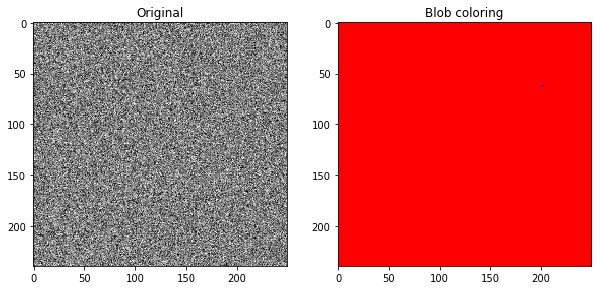

In [86]:
mandrill = skio.imread('mandrill.png')

noise = skio.imread('noise.png')

cameraman = skio.imread('cameraman.png')

print(nat_img_dect1(noise, True))

This method works, but may be caught up if a noisy image has a particularly large connected component that passes the threshold.

## Convolution Edge Detection

In [147]:
from scipy.ndimage.filters import convolve

def nat_img_dect2(img, debug=False):
    """detects whether an image is just random noise or a natural image using convolution
    edge detection"""
    natural = False
    kernel = np.asarray([[0,1,0],
                    [1,-4,1],
                    [0,1,0]], dtype='float')
    
    img_norm = (img - img.min()) / (img.max() - img.min())
    
    edges = convolve(img_norm, kernel)
    edges2 = convolve(edges, kernel)
    
    if debug: 
        fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16,16))
        ax1.imshow(img, cmap='gray')
        ax2.imshow(edges2, cmap='gray')
        
        print(edges.max() - edges.min())
    
    range = edges.max() - edges.min()
    
    if range < 5:
        natural = True
        
    return natural

5.96078431372549
False


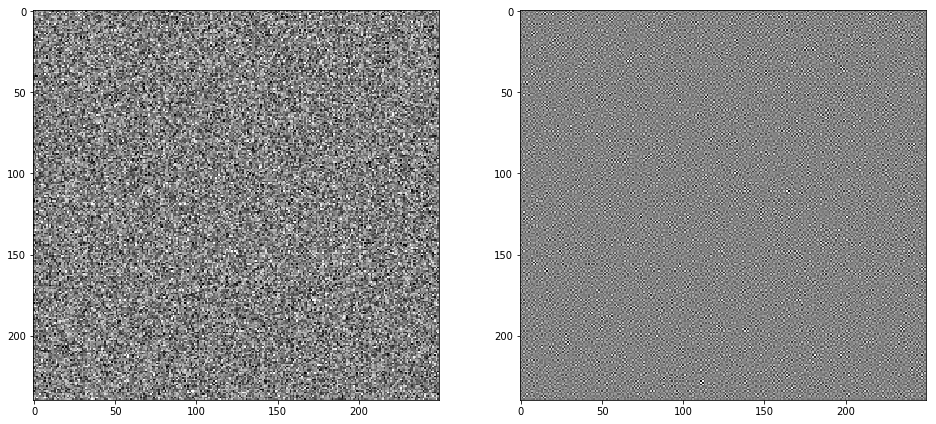

In [149]:
mandrill = skio.imread('mandrill.png')

noise = skio.imread('noise.png')

cameraman = skio.imread('cameraman.png')

planks = skio.imread('Planks.tif')

print(nat_img_dect2(noise, True))

This method is effective at detecting natural images, but like the previous approach, there may be some edge cases that get past this detector.

## Canny Edge Detection

In [85]:
from skimage import feature

def nat_img_dect3(img, debug=False):
    """detects whether an image is just random noise or a natural image using Canny
    edge detection"""
    natural = False
    
    #omega = 3, takes away lot of the edges, and leaves noisy images black
    edges = feature.canny(img, 3)
    
    
    if debug: 
        print(sum(edges.flat))
        fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16,16))
        ax1.imshow(img, cmap='gray')
        ax2.imshow(edges, cmap='gray')
    
    if sum(edges.flat) > 0:
        natural = True
        
    return natural

966
True


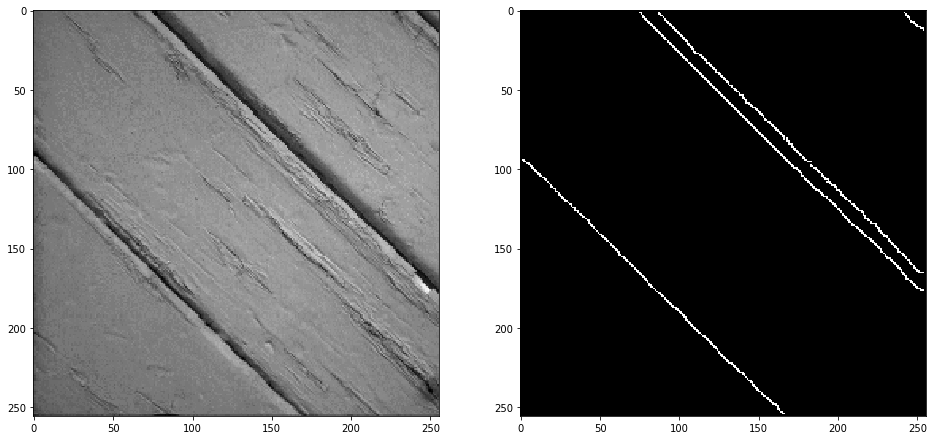

In [131]:
mandrill = skio.imread('mandrill.png')

noise = skio.imread('noise.png')

cameraman = skio.imread('cameraman.png')

planks = skio.imread('Planks.tif')

print(nat_img_dect3(planks, True))

This is probably the most effective method. Canny Edge Detection produces the most clear edges, and by raising the omega parameter to 3, there are no edges detected in a noisy image. 

## Combining Connected Components and Convolution Edge Detection

In [141]:
def nat_img_dect4(img, debug=False):
    """detects whether an image is just random noise or a natural image using convolution
    edge detection, then connected components analysis"""
    natural = False
    kernel = np.asarray([[0,1,0],
                    [1,-4,1],
                    [0,1,0]], dtype='float')
    
    img_norm = (img - img.min()) / (img.max() - img.min())
    
    edges = convolve(img_norm, kernel)
        
    lbl = skm.label(edges)
    
    areaMax = max([p.area for p in skms.regionprops(lbl)])
    
    if debug:
        clean = skm.remove_small_objects(lbl, min_size=areaMax)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
        ax1.imshow(img, cmap='gray')
        ax1.set_title('Original')
        ax2.imshow(skc.label2rgb(lbl))
        ax2.set_title('Blob coloring')
        
        print(areaMax)
    
    if areaMax <= 5:
        natural = True
    
    return natural

5
True


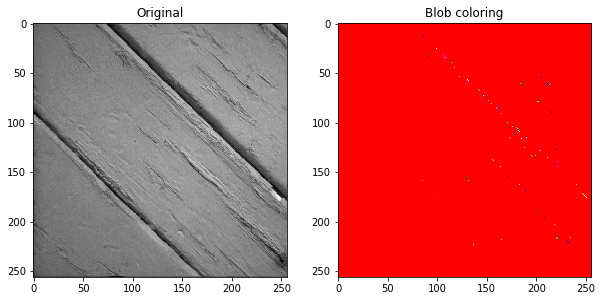

In [146]:
mandrill = skio.imread('mandrill.png')

noise = skio.imread('noise.png')

cameraman = skio.imread('cameraman.png')

planks = skio.imread('Planks.tif')

print(nat_img_dect4(planks, True))

This method was less effective than the others; there is a less clear pattern of connected components after applying an edge detecting convolution.